# Importing necessary Libraries

In [7]:
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('punkt')
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sijan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing dataset

In [9]:
column_names_train=['Title','Genre','Description']
train_data = pd.read_csv("Data/train_data.txt",sep=':::',names=column_names_train,engine='python')
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
column_names_test=['Id','Title','Description']
test_data = pd.read_csv("Data/test_data.txt",sep=':::',names=column_names_test,engine='python')
test_data.head()


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


# Data Visualization

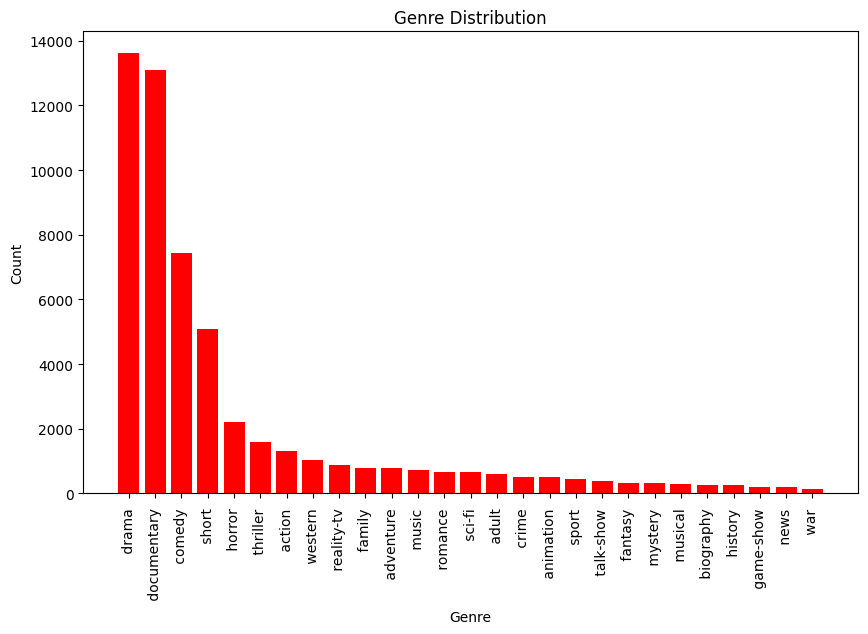

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
genre_counts = train_data["Genre"].value_counts()
plt.bar(genre_counts.index,genre_counts,color = 'red')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=90)
plt.show()
train_data


# Data processing and cleaning text

In [12]:
#Gathering less informative words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

#Cleaning text
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text = re.sub(r"\s[\s]+", " ", text).strip()
    return text


In [13]:
train_data['Text_cleaning']= train_data['Description'].apply(clean_text)
test_data['Text_cleaning']= test_data['Description'].apply(clean_text)

In [14]:
train_data.head()

,Title,Genre,Description,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


In [15]:
test_data.head()

,Id,Title,Description,Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [17]:
#Apply length to the cleaning train data
train_data['length of cleaned text'] = train_data['Text_cleaning'].apply(len)
train_data['length of cleaned text'].values.reshape(-1,1)
train_data.head(10)


,Title,Genre,Description,Text_cleaning,length of cleaned text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,383
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,402
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,745
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,402
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,quality control consists series single take sh...,1207
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough economic times max joey run ideas discov...,205
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petrie keanu reeves troubled teen whose li...,228
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",sudden calamitous event causing great loss lif...,300
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,four high school students embark terrifying jo...,324


# Data visualization

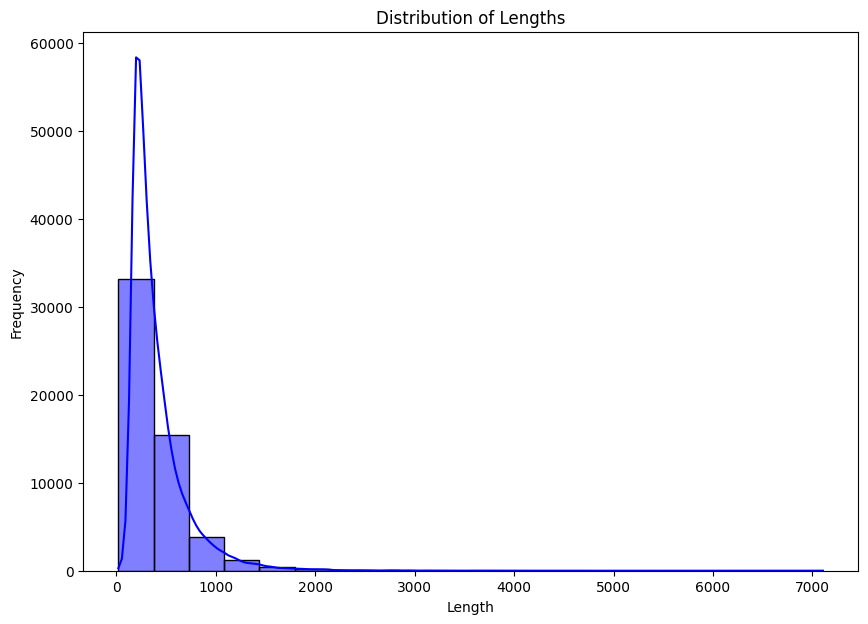

In [26]:
plt.figure(figsize=(10, 7))
sns.histplot(data=train_data, x='length of cleaned text', bins=20, kde=True, color='blue')

# Customize the plot
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Lengths')

# Show the plot
plt.show()

# Text Vectorization Using TF-IDF

In [34]:
tfidf_vectorizer = TfidfVectorizer()

#Fitting and transforming the train data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

#Transforming the test data into vectorized form
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

# Split Data and Train a Model (Naive Bayes)

In [35]:
# Splitting train and test data
X= X_train
y = train_data['Genre']
X_train , X_val, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)
# Initialize and train a Multinomial Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
prediction= classifier.predict(X_val)

accuracy = accuracy_score(y_test, prediction)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, prediction))



Validation Accuracy: 0.44526422576777647


C:\Users\sijan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sijan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\sijan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediction of data

In [295]:
X_test_predictions = classifier.predict(X_test)
test_data['Predicted Genre']= X_test_predictions
test_data.to_csv('predictedgenre.csv', index= False)
print(test_data)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    